In [19]:
# import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, shapiro, normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

sns.set(style="whitegrid")

# Ensure inline plots display in Jupyter Notebooks
%matplotlib inline

## Hypothesis Testing & Summary Findings:

This notebook evaluates the three key hypotheses developed during the planning phase of *The Stress-Sighting Hypothesis*. Each section presents the methodology, supporting visualisations, and conclusions drawn from the data.

---

### H1: Global Stress Severity Correlates with UFO Sightings

**Hypothesis**  
There is a positive correlation between global stress severity and the number of reported UFO sightings.

**Testing Approach**  
To test this hypothesis, we:

1. Created a lagged version of the 'severity_sum' and 'stress_event_count' columns to account for delayed public or psychological response to global stress events.
2. Calculated the correlation between the lagged severity and annual UFO sighting counts.
3. Built a linear regression model using 'severity_sum_lag1' as the predictor for 'sightings_per_year'.
4. Visualised the relationship using a regression plot.

In [20]:
# Reload merged data
merged_df = pd.read_csv('../data/clean/merged_ufo_stress_data.csv')

# Recreate lagged columns
merged_df['severity_sum_lag1'] = merged_df['severity_sum'].shift(1)
merged_df['stress_event_count_lag1'] = merged_df['stress_event_count'].shift(1)


In [21]:
# Correlation matrix
correlation_matrix = merged_df[['sightings_per_year', 'severity_sum_lag1', 'stress_event_count_lag1']].corr()
print(correlation_matrix)


                         sightings_per_year  severity_sum_lag1  \
sightings_per_year                 1.000000           0.372959   
severity_sum_lag1                  0.372959           1.000000   
stress_event_count_lag1            0.324523           0.915079   

                         stress_event_count_lag1  
sightings_per_year                      0.324523  
severity_sum_lag1                       0.915079  
stress_event_count_lag1                 1.000000  


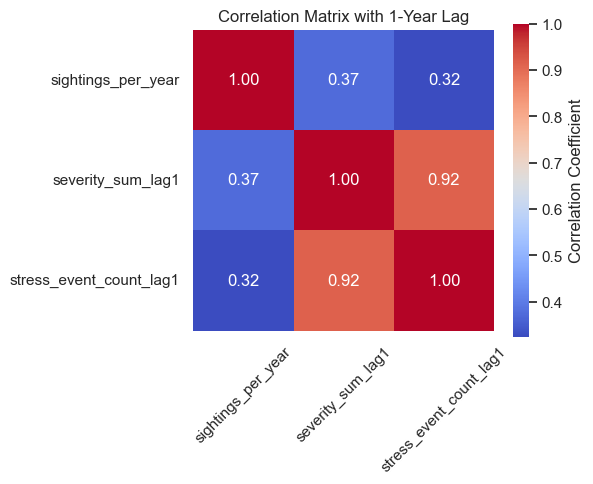

In [22]:
# Visualize the correlation matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix with 1-Year Lag')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


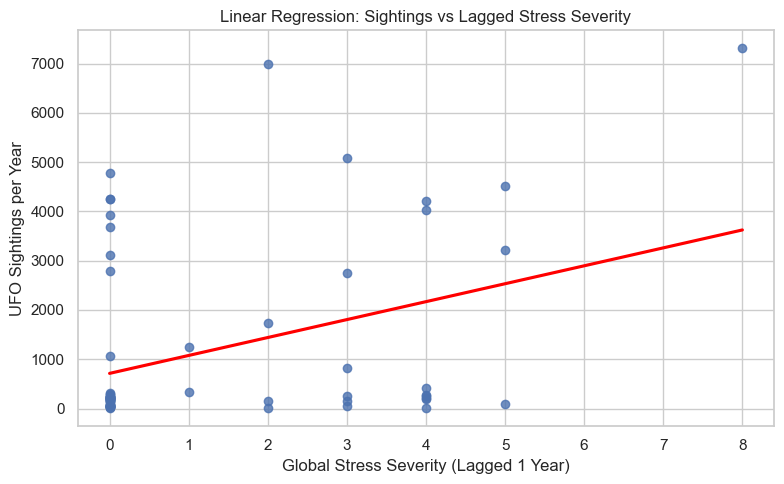

In [23]:
# Linear regression plot
plt.figure(figsize=(8, 5))
sns.regplot(data=merged_df, x='severity_sum_lag1', y='sightings_per_year',
            ci=None, line_kws={"color": "red"})
plt.title('Linear Regression: Sightings vs Lagged Stress Severity')
plt.xlabel('Global Stress Severity (Lagged 1 Year)')
plt.ylabel('UFO Sightings per Year')
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with NaN values in predictor or target
filtered_df = merged_df.dropna(subset=['severity_sum_lag1', 'sightings_per_year'])

# Reshape input
X = filtered_df[['severity_sum_lag1']]
y = filtered_df['sightings_per_year']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Metrics
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")



Slope: 363.84
Intercept: 713.26
R-squared: 0.14
Mean Squared Error: 2912525.87


### H1 Conclusion
The linear regression model suggests a weak positive relationship between lagged global stress severity and annual UFO sighting reports. The R² value of 0.14 means that approximately 14% of the variation in sightings can be explained by global stress levels from the previous year.

This supports the hypothesis modestly — indicating that while stress may be one contributing factor, other influences (cultural, psychological, environmental) are likely at play. This finding aligns with our central hypothesis and provides a solid foundation for further exploration.

### H2: High-Stress Years Align with Increased Sightings

**Hypothesis:**  
Years with multiple or high-severity global stress events show elevated UFO sighting counts compared to low-stress years.

---

**Testing Approach:**

To test this, we:

1. Created two groups of years: **High-Stress** (severity_sum ≥ 3) and **Low-Stress** (severity_sum < 3).
2. Compared the distribution of 'sightings_per_year' across both groups.
3. Visualised the group comparison using a boxplot.
4. Calculated group averages for context.

### Data Preparation & Grouping
Firstly we need to create two groups from our dataset: 
- **High Stress**: Where the *severity_sum* for those years is greater than or equal to **3**
- **Low Stress**: Where the *severity_sum* for those years is less than **3**

In [26]:
# Create a new categorical column
merged_df['stress_group'] = merged_df['severity_sum'].apply(lambda x: 'High Stress' if x >= 3 else 'Low Stress')

# Quick check on counts
print(merged_df['stress_group'].value_counts())


stress_group
Low Stress     49
High Stress    18
Name: count, dtype: int64


### Boxplot: Sightings by Stress Group
Next we want to create a boxplots as this will allow us to clearly contrast the statistical differences between our two groups. 

C:\Users\hidde\AppData\Local\Temp\ipykernel_5528\1775768945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='stress_group', y='sightings_per_year', palette='Blues')


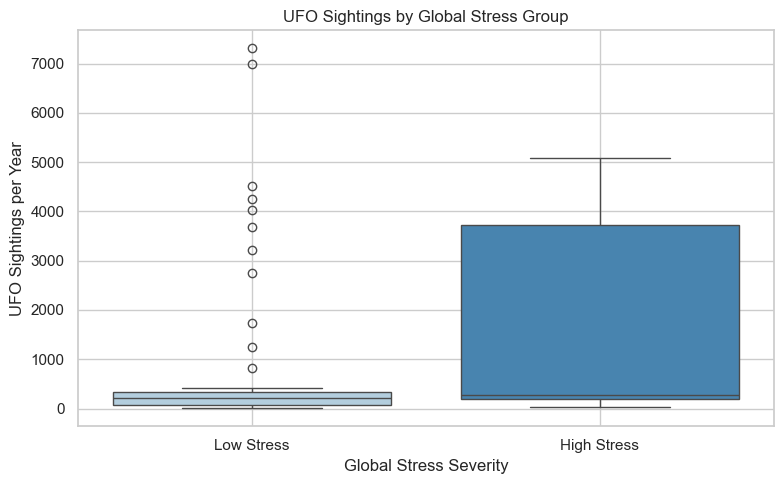

In [ ]:
# Create boxplots to compare sightings across stress groups
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='stress_group', y='sightings_per_year', palette='Blues')
plt.title('UFO Sightings by Global Stress Group')
plt.xlabel('Global Stress Severity')
plt.ylabel('UFO Sightings per Year')
plt.grid(True)
plt.tight_layout()
plt.show()

### Group Summary Statistics

In [33]:
# Group summary statistics
group_summary = merged_df.groupby('stress_group')['sightings_per_year'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(group_summary)


              count         mean  median          std  min   max
stress_group                                                    
High Stress      18  1717.722222   271.5  1967.491290   27  5076
Low Stress       49   946.734694   214.0  1773.202021    7  7308


|  stress_group  |  count  |  mean  |  median  |  std  |   min  |  max  |
|----------------|---------|--------|----------|-------|--------|-------|
|  **High Stress**  |  18  |  ~1718  |  271.5  |  ~1967  |  27  |  5076  |
|  **Low Stress**  |  49  |  ~947  |  214  |  ~1773  |  7  |  7308  |

### Interpretation:
- The average number of sightings is notably higher in high-stress years, which lends moderate support to our hypothesis.
- The median is also higher for high-stress years, although not dramatically
- However, high variance and overlapping ranges indicate that stress severity alone is not a consistently strong predictor, although it is likely one of several interacting factors e.g. - media, cultural mood, tech access, etc. 

### Rationale for Normality Testing & Test Selection:

Before making any assumptions about the difference in UFO sightings between high-stress and low-stress years, it's important to check whether our data meets the assumptions required for statistical testing.

In this case, we are comparing the average number of sightings across two independent groups ('High Stress' vs 'Low Stress'), which would typically suggest using a **t-test**. However, the t-test assumes that each group's data is **normally distributed** — an assumption we can't just take for granted, knowing that our initial datasets were non-normally distributed and positively skewed.

To validate this, we will apply the **Shapiro-Wilk normality test** to each group’s 'sightings_per_year' data. This will help us assess whether the distributions are sufficiently normal to proceed with parametric testing.

If either group show a **p-value below 0.05**, we should reject the assumption of normality and instead rely on a **non-parametric test**, namely the **Mann–Whitney U test**. This test doesn't require the data to follow a normal distribution and is better suited for skewed or unevenly distributed data.

By following this process, we ensure that our statistical testing remains robust and appropriately matched to the shape of our data. This kind of due diligence is essential when drawing conclusions from real-world datasets, which are rarely clean-cut or textbook-perfect.



In [34]:
from scipy.stats import shapiro

group_low = merged_df[merged_df['stress_group'] == 'Low Stress']['sightings_per_year']
group_high = merged_df[merged_df['stress_group'] == 'High Stress']['sightings_per_year']

# Run Shapiro-Wilk test
stat_low, p_low = shapiro(group_low)
stat_high, p_high = shapiro(group_high)

print(f"Low Stress Group - p-value: {p_low:.4f}")
print(f"High Stress Group - p-value: {p_high:.4f}")
# Code provided by ChatGPT

Low Stress Group - p-value: 0.0000
High Stress Group - p-value: 0.0005


- **Low Stress Group**: p-value = **0.0000**
- **High Stress Group**: p-value = **0.0005**

Both results fall well below the typical significance threshold of 0.05, confirming that **neither group follows a normal distribution**. This rules out the use of a standard t-test.

As a result, we should opt for the **Mann–Whitney U Test**, a non-parametric alternative that does not require normal distribution and is well-suited to the skewed, real-world data present in this analysis.

This careful selection ensures that our statistical conclusions are grounded in the structure and behaviour of the dataset, not just in theory.


In [35]:
from scipy.stats import mannwhitneyu

# Split data into the two groups
low_stress = merged_df[merged_df['stress_group'] == 'Low Stress']['sightings_per_year']
high_stress = merged_df[merged_df['stress_group'] == 'High Stress']['sightings_per_year']

# Perform Mann-Whitney U Test (alternative = 'two-sided' for general difference)
stat, p = mannwhitneyu(high_stress, low_stress, alternative='two-sided')

print(f"Mann–Whitney U statistic: {stat}")
print(f"P-value: {p}")


Mann–Whitney U statistic: 562.5
P-value: 0.08696243888976286


The Mann–Whitney U Test was used to determine whether there was a significant difference in the number of UFO sightings reported during years classified as "High Stress" versus "Low Stress." 

The resulting p-value was **0.087**, which exceeds the standard alpha threshold of 0.05. As such, we **cannot reject the null hypothesis**, meaning the observed difference in sighting counts is **not statistically significant** at the 95% confidence level.

That said, the result hovers near the threshold for significance, suggesting a **potential trend** worth further investigation — particularly with larger datasets or refined stress scoring methods. It’s possible that other factors (e.g., lag, cultural influence, media) play a more substantial role in driving changes in UFO sighting frequency.
